In [2]:
from pathlib import Path
import pandas as pd
import requests
from zipfile import ZipFile
import matplotlib.pyplot as plt
import seaborn as sns
import os
import shutil

In [26]:
import itertools
months = [1, 2, 3]
years = [2018, 2023]
for year, month in itertools.product(years, months):
    file_name = f"{year}{month:02}-capitalbikeshare-tripdata.zip"
    print(file_name)

base_url = "https://s3.amazonaws.com/capitalbikeshare-data/"

201801-capitalbikeshare-tripdata.zip
201802-capitalbikeshare-tripdata.zip
201803-capitalbikeshare-tripdata.zip
202301-capitalbikeshare-tripdata.zip
202302-capitalbikeshare-tripdata.zip
202303-capitalbikeshare-tripdata.zip


In [4]:
# download file from s3 bucket unzip it and read csv file with pandas

def download_locally(base_url: str, file_name: str) -> Path:
    """Download files locally to then upload them to S3"""
    dir_path = Path('../data')
    filepath = Path(dir_path /file_name)
    if not filepath.exists():
        url = base_url + file_name
        response = requests.get(url, timeout=100)
        # if not dir_path.exists():
        #     dir_path.mkdir()
        with filepath.open('wb') as f:
            f.write(response.content)
    return filepath

In [5]:
# unzip a file
def unzip_file(file_name: str, output_dir: str ='../data/'):
    with ZipFile(file_name, 'r') as zip_ref:
        zip_ref.extractall(output_dir)

In [31]:
for year, month in itertools.product(years, months):
    file_name = f"{year}{month:02}-capitalbikeshare-tripdata.zip"
    local_zip = download_locally(base_url, file_name)
    unzip_file(local_zip)
    os.remove(local_zip)
    shutil.rmtree(local_zip.parent / "__MACOSX", ignore_errors=True)

In [7]:
df = pd.read_csv('../data/202301-capitalbikeshare-tripdata.csv', parse_dates=['started_at', 'ended_at'])

In [8]:
df.dropna(inplace=True)
df['duration'] = df.ended_at - df.started_at
df.duration = df.duration.apply(lambda td: td.total_seconds() / 60)
df = df[(df.duration >=1) & (df.duration <= 100)]


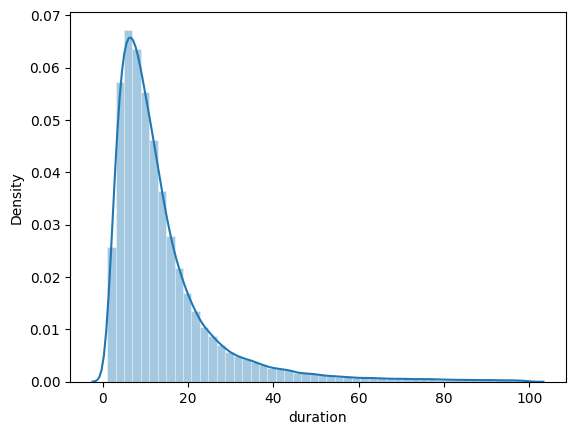

In [9]:
sns.histplot(
    df.duration , kde=True,
    stat="density", kde_kws=dict(cut=3), bins=50,
    alpha=.4, edgecolor=(1, 1, 1, 0.4),
);

In [16]:
df['hour'] = df.started_at.dt.hour

In [10]:
categorical = ['start_station_id', 'end_station_id', 'rideable_type', 'member_casual']
numerical = ['start_lat', 'start_lng', 'end_lat', 'end_lng']

In [17]:
df

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,duration,hour
0,65F0ACD101BF0D49,classic_bike,2023-01-04 19:34:07,2023-01-04 19:39:29,East Falls Church Metro / Sycamore St & 19th St N,31904.0,W Columbia St & N Washington St,32609.0,38.885321,-77.156427,38.885621,-77.166917,member,5.366667,19
2,33E85889625FF7CA,classic_bike,2023-01-05 20:44:38,2023-01-05 20:51:18,15th & L St NW,31276.0,Thomas Circle,31241.0,38.903649,-77.034918,38.905900,-77.032500,member,6.666667,20
3,E1F055A1651F47A1,classic_bike,2023-01-03 17:45:14,2023-01-03 17:57:23,Hartland Rd & Harte Pl,32255.0,Merrifield Cinema & Merrifield Town Center,32235.0,38.878601,-77.222808,38.870093,-77.229970,member,12.150000,17
4,88CC90CEEC298BAF,classic_bike,2023-01-03 05:18:46,2023-01-03 05:25:50,Merrifield Cinema & Merrifield Town Center,32235.0,Hartland Rd & Harte Pl,32255.0,38.870093,-77.229970,38.878601,-77.222808,member,7.066667,5
5,3E1CDC543ED2A000,classic_bike,2023-01-11 16:55:16,2023-01-11 17:21:54,Smithsonian-National Mall / Jefferson Dr & 12t...,31248.0,23rd & E St NW,31260.0,38.888774,-77.028694,38.896104,-77.049882,casual,26.633333,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204071,03A4923C5C594BF8,classic_bike,2023-01-07 15:05:50,2023-01-07 15:12:22,9th & Ingraham St NW,31424.0,9th & Ingraham St NW,31424.0,38.953663,-77.025613,38.953663,-77.025613,member,6.533333,15
204073,B98CAF2704F3C775,classic_bike,2023-01-18 18:56:15,2023-01-18 19:12:32,4th & Florida Ave NE,31532.0,Eastern Market Metro / Pennsylvania Ave & 8th ...,31613.0,38.907316,-77.000698,38.884095,-76.995234,casual,16.283333,18
204074,98C55996101A7D83,classic_bike,2023-01-04 10:11:59,2023-01-04 10:14:24,M St & Pennsylvania Ave NW,31246.0,M St & Pennsylvania Ave NW,31246.0,38.905126,-77.056887,38.905126,-77.056887,casual,2.416667,10
204075,B8E2AAD40EC5675B,electric_bike,2023-01-11 17:36:30,2023-01-11 17:56:03,Tanner Park,31533.0,Eastern Market Metro / Pennsylvania Ave & 8th ...,31613.0,38.911257,-77.002206,38.884095,-76.995234,casual,19.550000,17


In [6]:
df = pd.read_csv('../data/processed/202004-202306-processed.csv',
dtype={'start_station_id': 'str', 'end_station_id': 'str', 'rideable_type': 'str', 'member_casual': 'str',
'hour': 'int', 'year': 'int', 'duration': 'float'},
parse_dates=['started_at'])

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8814264 entries, 0 to 8814263
Data columns (total 8 columns):
 #   Column            Dtype         
---  ------            -----         
 0   start_station_id  object        
 1   end_station_id    object        
 2   rideable_type     object        
 3   member_casual     object        
 4   hour              int64         
 5   year              int64         
 6   duration          float64       
 7   started_at        datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 538.0+ MB


In [9]:
df.rideable_type.value_counts()

rideable_type
classic_bike     6105459
docked_bike      1773224
electric_bike     935581
Name: count, dtype: int64

In [10]:
df.member_casual.value_counts()

member_casual
member    5300834
casual    3513430
Name: count, dtype: int64